### Face Mask Detection

Face Mask Detection is an openCV algorithm which is used to determine in the image or live if the person is wearing a face mask in this COVID-19 pandemic. 

###### Performed By : Muatif Shaikh 

In [1]:
# Importing the required libraries
import tensorflow as tf
import keras
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing import image
from keras.models import load_model
import numpy as np
import argparse
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
print(tf.__version__)
from time import sleep
import datetime
import time

2.4.1


##### Loading the saved h5 model where the algorithm is present to determine the face mask

In [2]:
model1 = tf.keras.models.load_model("My_Model.h5")

##### Haarcascade is pre built algorithm available in openCV to determine the face of the person 

In [3]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

##### Live Detection of the Face Mask

In [4]:
cap = cv2.VideoCapture(0)

width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while True:
    
    ret, img = cap.read()
    
    if ret == True:
        time.sleep(1/25)

        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 8)

        for (x, y, w, h) in faces:

            face = img[y:y+h, x:x+w]
            face = cv2.resize(face, (224, 224))
            face = img_to_array(face)
            face = preprocess_input(face)
            face = np.expand_dims(face, axis=0)
            (mask, withoutMask) = model1.predict(face)[0]
            mask = mask*100
            withoutMask = withoutMask*100

            font = cv2.FONT_HERSHEY_SIMPLEX

            # Getting Text Size in pixel
            # print("Image Width: " , w)
            textSize = cv2.getTextSize(text="No Mask: " + str("%.2f" % round(mask, 2)), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, thickness=3)
            # print("Text Width: " , textSize[0][0])

            if mask > withoutMask:
                cv2.putText(img,
                            text = "Mask: " + str("%.2f" % round(mask, 2)),
                            org = (x-5,y-20),
                            fontFace=font,
                            fontScale = (2*w)/textSize[0][0],
                            color = (0, 255, 0),
                            thickness = 3,
                            lineType = cv2.LINE_AA)
                cv2.rectangle(img, (x, y), (x+w, y+h), (0,255,0), 5)
            else:
                cv2.putText(img,
                            text = "No Mask: " + str("%.2f" % round(withoutMask, 2)),
                            org = (x-5, y-20),
                            fontFace=font,
                            fontScale = (1.8*w)/textSize[0][0],
                            color = (0, 0, 255),
                            thickness = 3,
                            lineType = cv2.LINE_AA)
                cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 5)
        
        
        # Display    
        cv2.imshow("Face Mask Detection",img)

        if cv2.waitKey(1) & 0XFF == ord('q'):
            break
    else:
        break
        
cap.release()
cv2.destroyAllWindows()

##### Detection of Face Mask in an Image

In [5]:
images = ['example_01.png']

Image Width:  128
Text Width:  253


True

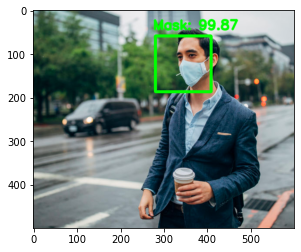

In [6]:
img = images[0]
img = plt.imread(img,format='8UC1')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.05, 10)

# Draw the rectangle around each face
for (x, y, w, h) in faces:

    face = img[y:y+h, x:x+w]
    face = cv2.resize(face, (224, 224))
    face = img_to_array(face)
    face = preprocess_input(face)
    face = np.expand_dims(face, axis=0)
    (mask, withoutMask) = model1.predict(face)[0]
    mask = mask*100
    withoutMask = withoutMask*100
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    # Getting Text Size in pixel
    print("Image Width: " , w)
    textSize = cv2.getTextSize(text="No Mask: " + str("%.2f" % round(mask, 2)), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, thickness=3)
    print("Text Width: " , textSize[0][0])
    
    if mask > withoutMask:
        cv2.putText(img,
                    text = "Mask: " + str("%.2f" % round(mask, 2)),
                    org = (x-5,y-15),
                    fontFace=font,
                    fontScale = (2*w)/textSize[0][0],
                    color = (0, 255, 0),
                    thickness = 3,
                    lineType = cv2.LINE_AA)
        cv2.rectangle(img, (x, y), (x+w, y+h), (0,255,0), 5)
    else:
        cv2.putText(img,
                    text = "No Mask: " + str("%.2f" % round(withoutMask, 2)),
                    org = (x-5,y-15),
                    fontFace=font,
                    fontScale = (1.8*w)/textSize[0][0],
                    color = (255, 0, 0),
                    thickness = 3,
                    lineType = cv2.LINE_AA)
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 5)

# Display
plt.imshow(img)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
cv2.imwrite("image1.jpeg",img)
